In [1]:
# !pip3 -qq install yargy --progress-bar off
# !pip3 -qq install pymorphy2 --progress-bar off
# !pip3 -qq install rusenttokenize --progress-bar off
# !pip3 install gensim.utils

In [2]:
# !pip3 install pymystem3

In [53]:
import sys
import nltk

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud_by_freq_dict(freq_dict):
    
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=freq_dict)
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [56]:
from collections import defaultdict as dd # удобный словарик
from operator import itemgetter # способ доставать n-ый элемент из iterable

In [57]:
from nltk.corpus import stopwords
from rusenttokenize import ru_sent_tokenize
import string
import pymorphy2
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
morph_analyzer = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

In [59]:
from pymystem3 import Mystem

In [60]:
mystem = Mystem() 

бармалей	0.06013363028953231
африка	0.057906458797327406
ребенок	0.04008908685968819
добрый	0.024498886414253893
акула	0.020044543429844096
крокодил	0.020044543429844096
маленький	0.015590200445434299
милый	0.015590200445434299
горилла	0.013363028953229399
говорить	0.013363028953229399


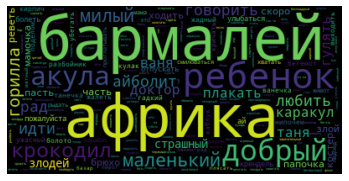

In [61]:
morph_analyzer = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

with open("C:/Users/rigel/Desktop/Корней_Чуковский.txt", "r", encoding = 'utf-8') as file:
    text = file.read()

    words = mystem.lemmatize(text.replace('Не-е-ет', 'нет').replace('\n', ' ').replace('«', ' ').replace('»', ' ').replace('—', ' ').replace('па-асть', 'пасть'))

    clean_words = [word.strip(string.punctuation) for word in words]
    clean_words = [word.lower() for word in clean_words if word not in russian_stopwords]
    clean_words = [word.lower() for word in clean_words if word.strip() not in ['']]
    clean_words = [word.lower().replace('бармаль', 'бармалей').replace('бармалея', 'бармалей') for word in clean_words]
        
    text_words_frequencies = dd(int)  # все частоты = 0 

    for word in clean_words:
        text_words_frequencies[word] += 1 / len(clean_words)

    sorted_frequency_table = sorted(text_words_frequencies.items(), 
                                        key=itemgetter(1), reverse=True) 
    
    for word, freq in sorted_frequency_table[:10]:
        print('\t'.join((word, str(freq))))
        
    show_wordcloud_by_freq_dict(text_words_frequencies)


ходите	0.5773502691896258
гулять	0.5773502691896258
обижать	0.2886751345948129
кусать	0.2886751345948129
будут	0.2886751345948129
бить	0.2886751345948129


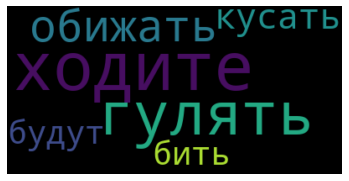

In [62]:
text2 = 'ходите гулять Будут кусать, Бить обижать,- ходите, гулять.'

# ms_analyzed = mystem.analyze(text2)

# print(ms_analyzed)

sent_text = ru_sent_tokenize(text2)
sent_text     
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit_transform(sent_text)
feature_names = tfidf_vectorizer.get_feature_names()
feature_names


X = tfidf_vectorizer.transform(sent_text)

tfidf_scores = [(feature_names[col], X[0, col]) for col in X.nonzero()[1]]
tfidf_scores

freq_list = [(word, freq) for word, freq in sorted(tfidf_scores, 
                                                   key=itemgetter(1), 
                                                   reverse=True)]

for word, freq in freq_list[:10]:
        print('\t'.join((word, str(freq))))

show_wordcloud_by_freq_dict(dict(freq_list))
